In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
df=pd.read_csv('/content/drive/MyDrive/woc/Kmean_dataset.csv')
x_train=np.array(df.iloc[:,:], dtype="int")
#x_test=np.array(df.iloc[,:], dtype="int")
x_train.shape

(178, 13)

In [59]:
class KM_cluster:
  def __init__(self,k,iterations):
      self.k=k
      self.iterations=iterations
      self.initialized = False
  def Normalize(self,x):
       min=np.min(np.unique(x))
       max=np.max(np.unique(x))
       X=(x-min)/(max-min)
       return X
  def initialize_centroids(self, n):
      if not self.initialized:
          self.c=np.random.rand(self.k, n)
          self.initialized=True
  def euclidean_dist(self,x,y):
      d=np.sqrt(np.sum((x-y)**2,axis=1))
      return d
  def Train(self,x):
      m=x.shape[0]
      n=x.shape[1]
      X=self.Normalize(x)
      self.initialize_centroids(n)
      V=[]
      for _ in range(self.iterations):
         E=np.array([self.euclidean_dist(X, self.c[i]) for i in range(self.k)]).T
         minc=np.argmin(E, axis=0)
         for i in range(self.k):
            pts=np.where(minc==i)[0]
            if len(pts)>0:
              self.c[i]=np.mean(X[pts], axis=0)
         variation = np.sum(np.min(E, axis=0).reshape(1,-1),axis=1)
         V.append(variation)
      """plt.plot(np.arange(self.iterations),V)
      plt.ylabel("Variation")
      plt.xlabel("Iterations")"""
      return V[-1]

The least value of loss is for k=11


Text(0, 0.5, 'variation')

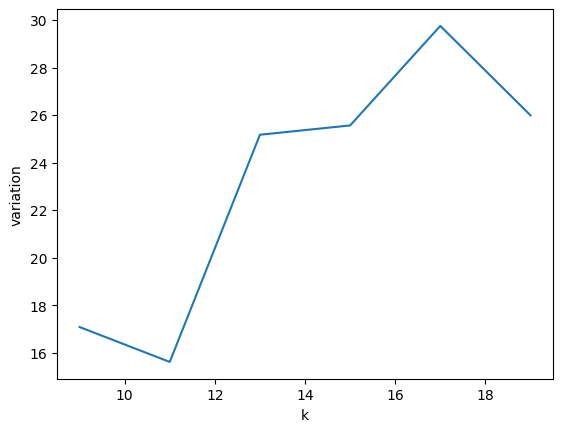

In [77]:
V=float('inf')
k=None
l=[]
for i in range(9,20,2):
  K=KM_cluster(i,15)
  loss=K.Train(x_train)
  l.append(loss)
  if loss < V:
    V=loss
    k=i

print(f"The least value of loss is for k={k}")
plt.plot(range(9,20,2),l)
plt.xlabel("k")
plt.ylabel("variation")